65.3119204314


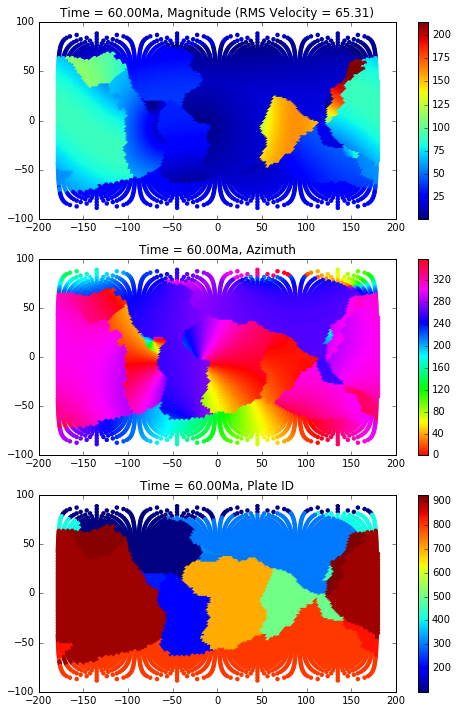

In [17]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}


recon_time = 60

# Send Request for velocities
r = requests.get('http://127.0.0.1:8000/velocity/plate_polygons/?time=%0.2f&domain_type=%s' % \
                 (recon_time,'healpix'),
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

RMS = np.sqrt(np.mean(data[:,2]**2,axis=0))
print RMS

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[index,0],data[index,1],c=data[index,2],edgecolors='')
plt.title('Time = %0.2fMa, Magnitude (RMS Velocity = %0.2f)' % (recon_time,RMS))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[index,0],data[index,1],c=np.degrees(data[index,3]),edgecolors='',cmap=plt.cm.hsv)
plt.title('Time = %0.2fMa, Azimuth' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[index,0],data[index,1],c=data[index,4],edgecolors='')
plt.title('Time = %0.2fMa, Plate ID' % (recon_time))
plt.colorbar()
plt.show()



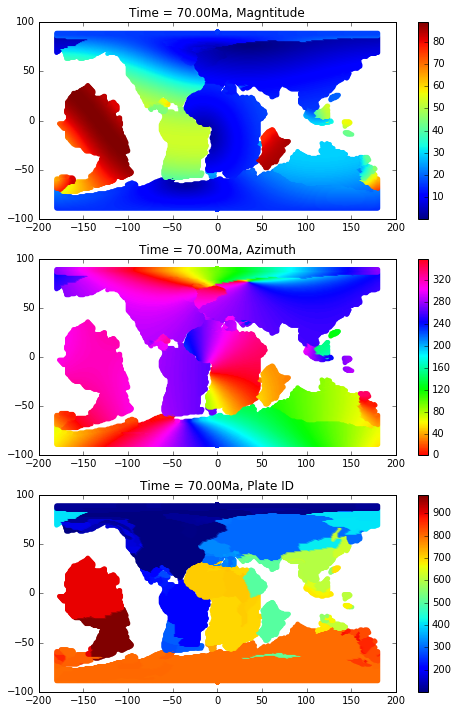

In [20]:

recon_time = 70

# Send Request for velocities
r = requests.get('http://127.0.0.1:8000/velocity/static_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

index = np.where(data[:,4]>0)

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[index,0],data[index,1],c=data[index,2],edgecolors='')
plt.title('Time = %0.2fMa, Magntitude' % (recon_time))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[index,0],data[index,1],c=np.degrees(data[index,3]),edgecolors='',cmap=plt.cm.hsv)
plt.title('Time = %0.2fMa, Azimuth' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[index,0],data[index,1],c=data[index,4],edgecolors='')
plt.title('Time = %0.2fMa, Plate ID' % (recon_time))
plt.colorbar()
plt.show()


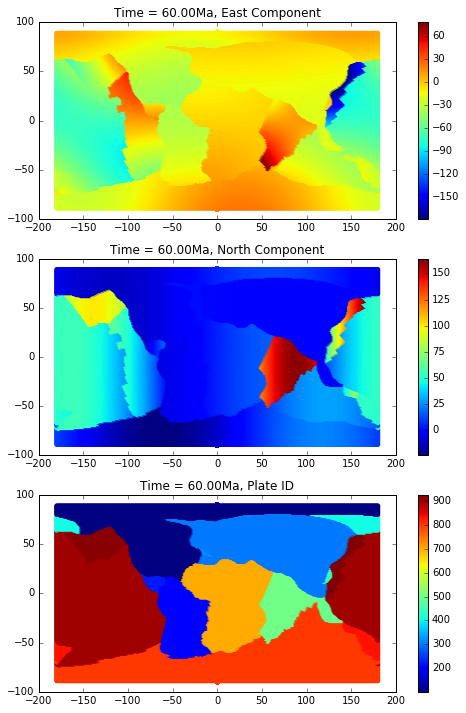

In [26]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 60

# Send Request for velocities
r = requests.get('http://127.0.0.1:8000/velocity/plate_polygons/?time=%0.2f&velocity_type=east_north' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[:,0],data[:,1],c=data[:,2],edgecolors='')
plt.title('Time = %0.2fMa, East Component' % (recon_time))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[:,0],data[:,1],c=data[:,3],edgecolors='')
plt.title('Time = %0.2fMa, North Component' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[:,0],data[:,1],c=data[:,4],edgecolors='')
plt.title('Time = %0.2fMa, Plate ID' % (recon_time))
plt.colorbar()
plt.show()



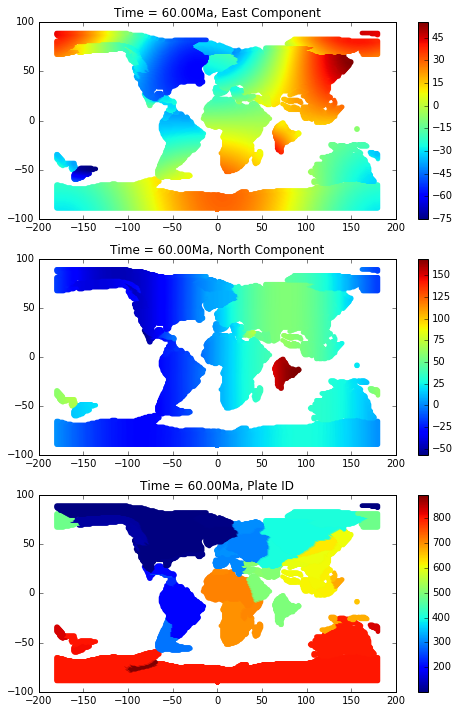

In [27]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 60

# Send Request for velocities
r = requests.get('http://127.0.0.1:8000/velocity/static_polygons/?time=%0.2f&velocity_type=east_north&model=GOLONKA' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

index = np.where(data[:,4]>0)

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[index,0],data[index,1],c=data[index,2],edgecolors='')
plt.title('Time = %0.2fMa, East Component' % (recon_time))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[index,0],data[index,1],c=data[index,3],edgecolors='')
plt.title('Time = %0.2fMa, North Component' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[index,0],data[index,1],c=data[index,4],edgecolors='')
plt.title('Time = %0.2fMa, Plate ID' % (recon_time))
plt.colorbar()
plt.show()




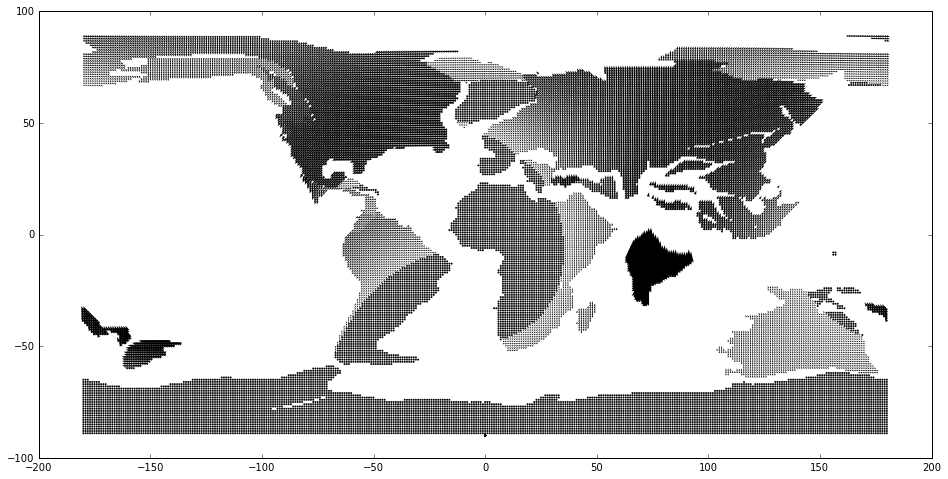

In [23]:
plt.figure(figsize=(16,8))
plt.quiver(data[index,0],data[index,1],data[index,2],data[index,3])
plt.gca().set_aspect('equal')
plt.show()


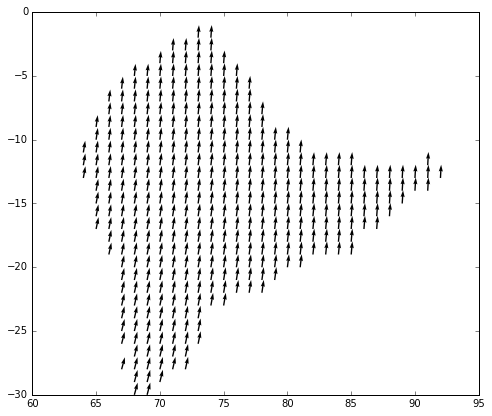

In [24]:
# Select points where plate id is 501 (India)
index = np.where(data[:,4]==501)

plt.figure(figsize=(8,8))
plt.quiver(data[index,0],data[index,1],data[index,2],data[index,3])
plt.gca().set_aspect('equal')
plt.show()


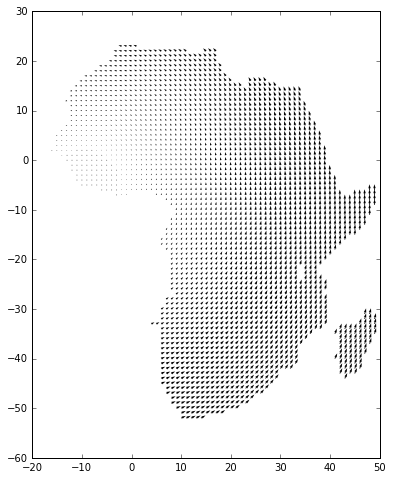

In [25]:
# Select points where plate id is somewhere in Africa (in the 700's)
index = np.where((data[:,4]>700) & (data[:,4]<800))

plt.figure(figsize=(8,8))
plt.quiver(data[index,0],data[index,1],data[index,2],data[index,3])
plt.gca().set_aspect('equal')
plt.show()